<a href="https://colab.research.google.com/github/daryl-ramdin/inm707-daryl-ramdin/blob/main/atari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Packages

In [1]:
!pip install ray
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install "gymnasium[accept-rom-license]"
!pip install -U tensorboardx

import ray
import gymnasium 
import torch
                 
from ray.rllib.algorithms.dqn.dqn import DQNConfig
from ray.rllib.algorithms.ppo import PPOConfig
from ray.tune.logger import pretty_print
from ray import air, tune


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 13.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 45.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 34.7 MB/s eta 0:00:00
  Installing build dependencies ... done


/usr/local/lib/python3.9/dist-packages/jax/_src/deprecations.py:51: DeprecationWarning: jax.ShapedArray is deprecated. Use jax.core.ShapedArray
  warnings.warn(message, DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


In [2]:
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device('cuda')

print("Selected device:",device)

Selected device: cuda


In [ ]:


# # #ray.shutdown()
# # #ray.init()

# #Let's configure our algorithm


config = DQNConfig()
config = config.environment("PongDeterministic-v4")
config.double_q = True
config = config.resources(num_gpus = 1)
config.replay_buffer_config["prioritized_replay"] = False
algo = config.build()

result = {}
logger1 = []
for i in range(25):
  results = algo.train()
  logger1.append([i,results["episode_reward_mean"],0])
  print("Epoch",i,"Episode Mean Reward",results["episode_reward_mean"])

print("done")

config = DQNConfig()
config.double_q = True
config = config.environment("ALE/Pong-ram-v5")
config = config.resources(num_gpus = 2)
config.replay_buffer_config["prioritized_replay"] = True

print(config.to_dict())
algo = config.build()

logger2 = []
for i in range(25):
  results = algo.train()
  logger2.append([i,results["episode_reward_mean"],0])
  print("Epoch",i,"Episode Mean Reward",results["episode_reward_mean"])

2023-04-19 18:04:32,573	WARNING util.py:67 -- Install gputil for GPU system monitoring.


Epoch 0 Episode Mean Reward -21.0


{'type': 'MultiAgentPrioritizedReplayBuffer', 'prioritized_replay': True, 'capacity': 50000, 'prioritized_replay_alpha': 0.6, 'prioritized_replay_beta': 0.4, 'prioritized_replay_eps': 1e-06, 'replay_sequence_length': 1, 'worker_side_prioritization': False}


AttributeError: ignored

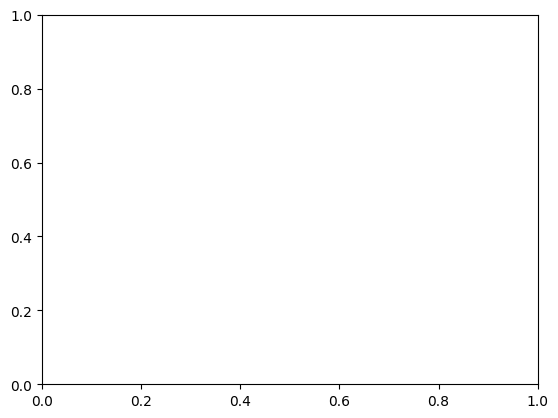

In [19]:
import numpy as np

import matplotlib.pyplot as plt
print(config.replay_buffer_config)
#Calculate the cumulative average over the episodes
logger1 = np.array(logger1)
for i in range(len(logger1)):
    logger1[i][2] = sum(logger1[0:i + 1, [1]]) / (i + 1)  # calculate the average cumulative reward

logger2 = np.array(logger2)
for i in range(len(logger1)):
    logger2[i][2] = sum(logger2[0:i + 1, [1]]) / (i + 1)  # calculate the average cumulative reward




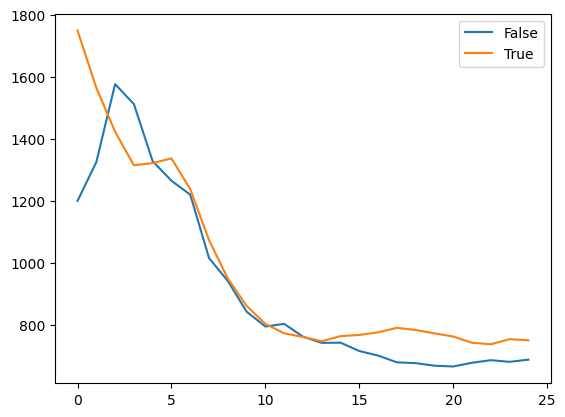

In [22]:
plt.plot(logger1[:, [0]], logger1[:, [1]], label="False")
plt.plot(logger2[:, [0]], logger2[:, [1]], label="True")
plt.legend()
plt.show()